# TV Titles Watched by First Aired
> How many TV titles have I watched by first aired date?

- toc: true
- badges: true
- author: Sanyam Kapoor
- categories: [tv, barplot]

In [1]:
#collapse-hide

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2., style='whitegrid')

In [2]:
#collapse-hide

import sys
from pathlib import Path

plotfiles_module_path = Path('.') / '..' / 'src'

if plotfiles_module_path not in sys.path:
  sys.path.insert(0, str(plotfiles_module_path.resolve()))

from plotfiles.dataset import load_tv

tv = load_tv()

## TV Titles Watched By First Aired Year

In [3]:
#collapse-hide

count_by_year = tv.groupby('first_air_year')['id'].count().reset_index()
count_by_year.first_air_year = count_by_year.first_air_year.astype(int)

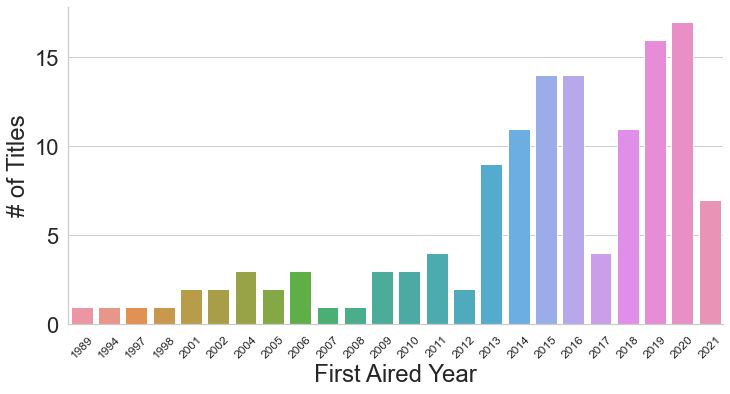

In [4]:
#collapse-hide

g = sns.catplot(data=count_by_year, x='first_air_year', y='id', kind='bar',
                dodge=False, height=6, aspect=16/9)

g.set(xlabel='First Aired Year', ylabel='# of Titles')
g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, fontdict=dict(size=12))

g.fig.tight_layout()

## First Aired Day of TV Titles Watched

In [5]:
#collapse-hide

import calendar

days_dict = dict(zip(calendar.day_name[0:], calendar.day_abbr[0:]))

count_by_day = tv.groupby('first_air_day')['id'].count().reset_index()
count_by_day.first_air_day = count_by_day.first_air_day.apply(lambda d: days_dict[d])

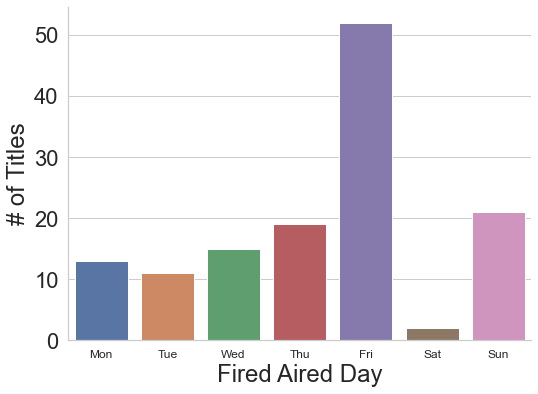

In [6]:
#collapse-hide

g = sns.catplot(data=count_by_day, x='first_air_day', y='id', kind='bar',
                order=calendar.day_abbr[0:],
                dodge=False, height=6, aspect=4/3)

g.set(xlabel='Fired Aired Day', ylabel='# of Titles')
g.set_xticklabels(g.ax.get_xticklabels(), fontdict=dict(size=12))

g.fig.tight_layout()

## First Aired Month of TV Titles Watched

In [7]:
#collapse-hide

import calendar

months_dict = dict(zip(calendar.month_name[1:], calendar.month_abbr[1:]))

count_by_month = tv.groupby('first_air_month')['id'].count().reset_index()
count_by_month.first_air_month = count_by_month.first_air_month.apply(lambda m: months_dict[m])

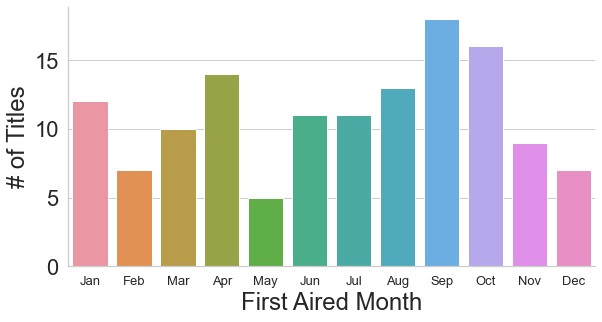

In [8]:
#collapse-hide

g = sns.catplot(data=count_by_month, x='first_air_month', y='id', kind='bar',
                order=calendar.month_abbr[1:], dodge=False, height=5, aspect=16/9)

g.set(xlabel='First Aired Month', ylabel='# of Titles')
g.set_xticklabels(g.ax.get_xticklabels(), fontdict=dict(size=13))

g.fig.tight_layout()